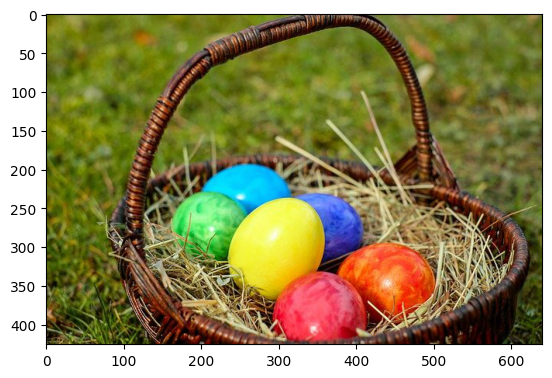

In [32]:
import numpy as np
from PIL import Image # 이미지 처리하기 편하다
import matplotlib.pyplot as plt

color_img = Image.open('/content/drive/MyDrive/[파이썬 AI 공부]/KakaoTalk_Photo_2023-04-05-10-15-21.jpeg')
plt.imshow(color_img)
plt.show()


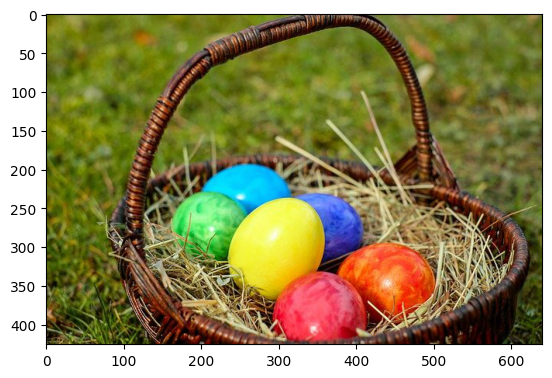

shape:{} (426, 640, 3)


In [33]:
# 우리가 필요한건 ndarray다.

color_pixel = np.array(color_img)
# pixel 데이터를 이용해서 그림을 그려보자.

plt.imshow(color_pixel)
plt.show()
print('shape:{}', format(color_pixel.shape)) #shape:{} (426, 640, 3)

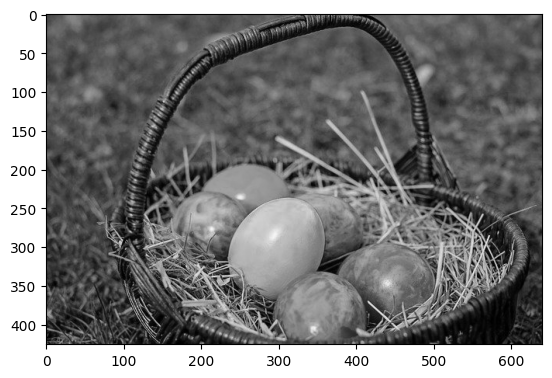

(426, 640, 3)


In [34]:
# 위의 그림을 흑백으로 바꿔볼 꺼다.
# 각 pixel의 RGB 값을 평균내서 RGB 칸에다 설정하면 흑백처리가 된다.

gray_pixel = color_pixel.copy()

for y in range(gray_pixel.shape[0]):
  for x in range(gray_pixel.shape[1]):
     gray_pixel[y,x] = np.mean(gray_pixel[y,x])

plt.imshow(gray_pixel)
plt.show()
print(gray_pixel.shape)

[[ 75  79  80 ... 102  92  86]
 [ 74  78  78 ... 100  90  84]
 [ 73  76  76 ...  98  90  84]
 ...
 [101  89  39 ...  15  22  44]
 [113  88  28 ...  14  34  45]
 [105 110  77 ...  28  48  51]]


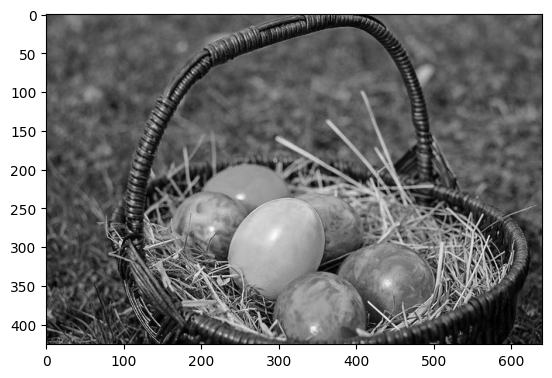

In [35]:
# 3차원 흑백이미지를 만들어봤다.
# 흑백은 3차원으로 하는 것보다 2차원으로 표현하면 사이즈를 줄일 수 있다.

gray_2d_pixel = gray_pixel[:,:,0]
print(gray_2d_pixel)

# 이미지를 2차원으로 바꿨다.
plt.imshow(gray_2d_pixel, cmap='gray')
plt.show()

In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

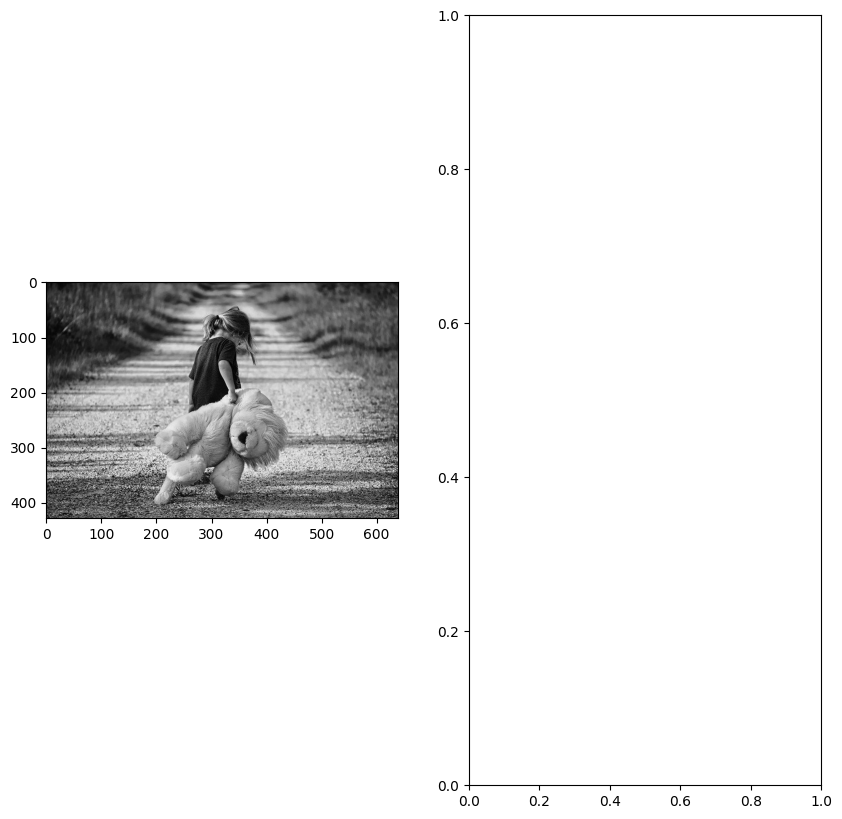

In [37]:
# 도화지 준비
fig = plt.figure(figsize=(10,10)) # 가로 세로 크기 inch단위

# 도화지를 두부분으로 나눈다.
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ori_image=img.imread('/content/drive/MyDrive/[파이썬 AI 공부]/girl-teddy.jpg')
ax1.imshow(ori_image)

In [38]:
print(ori_image.shape)

# 입력이미지의 형태
# (1,429, 640, 3) => (이미지 개수 , height , width, color)
input_image = ori_image.reshape((1,)+ ori_image.shape)
input_image =input_image.astype(np.float32)
print('Convolution input image.shape : {}'.format(input_image.shape))

# 입력이미지 channel 변경
# (1, 429, 640, 1) => (이미지 개수, height, width, color)
# slicing을 이용하여 첫번째 R(Red) 값만 이용
channel_1_input_image = input_image[:,:,:,0:1]
print('Channel 변경 input_image.shape : {}'.format(channel_1_input_image.shape))

(429, 640, 3)
Convolution input image.shape : (1, 429, 640, 3)
Channel 변경 input_image.shape : (1, 429, 640, 1)


In [39]:
# filter
# (3,3,1,1) => (filter height, filter width, filter channel, filter 개수)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])
print('적용할 filter shape : {}'.format(weight.shape)) # 적용할 filter shape : (3, 3, 1, 1)

적용할 filter shape : (3, 3, 1, 1)


In [40]:
conv2d = tf.nn.conv2d(channel_1_input_image,
                      weight,
                      strides=[1,1,1,1],
                      padding='VALID').numpy()

print('Convolution 결과 shape : {}'.format(conv2d.shape)) #Convolution 결과 shape : (1, 427, 638, 1)

Convolution 결과 shape : (1, 427, 638, 1)


In [1]:
t_img = conv2d[0,:,:,:]
ax2.imshow(t_img)

fig.tight_layout()
plt.show()

NameError: ignored

Convolution input image.shape : (1, 429, 640, 3)
Channel 변경 input_image.shape : (1, 429, 640, 1)
적용할 filter shape : (3, 3, 1, 1)


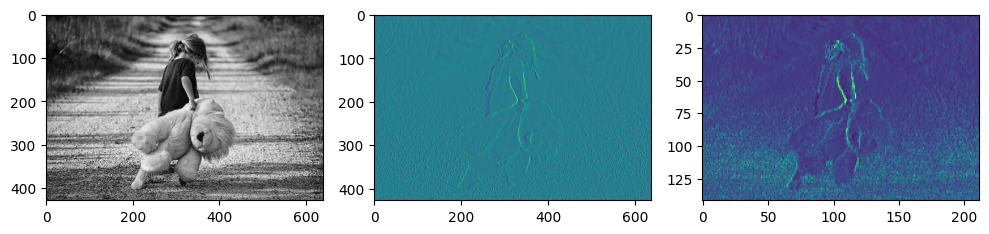

In [8]:
# 이번엔는 방금 곰소녀 이미지를 이용해서 
# pooling 처리 까지 한번 해 보자.

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# 도화지 생성
fig = plt.figure(figsize=(10,10))  # 가로세로 크기 inch단위

# 도화지 안에 그림판 3장
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ori_image = img.imread('/content/drive/MyDrive/[파이썬 AI 공부]/girl-teddy.jpg')

# 첫번째 그림판에는 이미지 원본을 출력!
ax1.imshow(ori_image)

# 입력이미지의 형태
# (1, 429, 640, 3) => (이미지 개수, height, width, color)
input_image = ori_image.reshape((1,) + ori_image.shape)
input_image = input_image.astype(np.float32)
print('Convolution input image.shape : {}'.format(input_image.shape))

# 입력이미지 channel 변경
# (1, 429, 640, 1) => (이미지 개수, height, width, color)
# slicing을 이용하여 첫번째 R(Red) 값만 이용
channel_1_input_image = input_image[:,:,:,0:1]
print('Channel 변경 input_image.shape : {}'.format(channel_1_input_image.shape))


# filter
# (3,3,1,1) => (filter height, filter width, filter channel, filter 개수)
# weight = np.random.rand(3,3,1,1)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])
print('적용할 filter shape : {}'.format(weight.shape))

# stride : 1 (가로1, 세로1)
# padding = 'VALID'

conv2d = tf.nn.conv2d(channel_1_input_image,
                      weight,
                      strides=[1,1,1,1],
                      padding='VALID')

t_img = conv2d[0,:,:,:]
# 2번째 그림판에 convolution한 이미지(특징을 뽑아낸) 출력
ax2.imshow(t_img)

## pooling 처리 ##

# ksize = pooling filter의 크기
pool = tf.nn.max_pool(conv2d, 
                      ksize=[1,3,3,1],
                      strides=[1,3,3,1], 
                      padding='VALID').numpy()

t_img = pool[0,:,:,:]
# 3번째 그림판에 convolution한 이미지(특징을 뽑아낸) 출력
ax3.imshow(t_img)

fig.tight_layout()
plt.show()

In [9]:
#MNIST를 CNN으로 구현해 볼꺼다.
# 1. MNIST를 Multinomial Classification으로 구현 => 정확도
# 2. MNIST를 DNN으로 구현 => 정확도
# 3. MNIST를 CNN으로 구현 => 정확도

In [3]:
# 공통코드
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Raw Data Set
df = pd.read_csv('/content/drive/MyDrive/[파이썬 AI 공부]/train (1).csv')
# display(df.head(), df.shape)
# 우리 데이터는 샘플로 제공된 거라서 결측치와 이상치는 없다.

# 데이터를 나눌꺼예요!(train(7), test(3))
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False),
                 df['label'],
                 test_size=0.3)

# 정규화 진행
scaler = MinMaxScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

In [4]:
# 첫번째 Model => Multinomial Classification(머신러닝)
model_1 = Sequential()

model_1.add(Flatten(input_shape=(784,)))
model_1.add(Dense(10, activation='softmax'))

model_1.compile(optimizer=Adam(learning_rate=1e-4),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               verbose=1,
                               mode='auto',
                               restore_best_weights=True)

model_1.fit(x_data_train_norm,
            t_data_train,
            epochs=2000,
            validation_split=0.2,
            verbose=1,
            batch_size=100,
            callbacks=[early_stopping])

Epoch 1/2000
236/236 [==============================] - 3s 9ms/step - loss: 1.9228 - accuracy: 0.4351 - val_loss: 1.5836 - val_accuracy: 0.6855
Epoch 2/2000
236/236 [==============================] - 1s 4ms/step - loss: 1.3672 - accuracy: 0.7429 - val_loss: 1.1863 - val_accuracy: 0.7784
Epoch 3/2000
236/236 [==============================] - 1s 3ms/step - loss: 1.0658 - accuracy: 0.7990 - val_loss: 0.9619 - val_accuracy: 0.8121
Epoch 4/2000
236/236 [==============================] - 1s 3ms/step - loss: 0.8873 - accuracy: 0.8231 - val_loss: 0.8220 - val_accuracy: 0.8333
Epoch 5/2000
236/236 [==============================] - 1s 3ms/step - loss: 0.7716 - accuracy: 0.8387 - val_loss: 0.7274 - val_accuracy: 0.8449
Epoch 6/2000
236/236 [==============================] - 1s 4ms/step - loss: 0.6907 - accuracy: 0.8482 - val_loss: 0.6597 - val_accuracy: 0.8539
Epoch 7/2000
236/236 [==============================] - 1s 3ms/step - loss: 0.6310 - accuracy: 0.8565 - val_loss: 0.6080 - val_accuracy:

In [5]:
# 첫번째 Model => Multinomial Classification(머신러닝)
# 평가는??  ===> 0.9217
print(model_1.evaluate(x_data_test_norm, t_data_test))

394/394 [==============================] - 1s 2ms/step - loss: 0.2880 - accuracy: 0.9185
[0.2880309522151947, 0.9184920787811279]


In [6]:
# 두번째 Model => DNN(딥러닝)
model_2 = Sequential()

model_2.add(Flatten(input_shape=(784,)))

# hidden layer가 포함되어야 해요!
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(32, activation='relu'))

model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer=Adam(learning_rate=1e-4),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               verbose=1,
                               mode='auto',
                               restore_best_weights=True)

model_2.fit(x_data_train_norm,
            t_data_train,
            epochs=2000,
            validation_split=0.2,
            verbose=1,
            batch_size=100,
            callbacks=[early_stopping])

Epoch 1/2000
236/236 [==============================] - 3s 9ms/step - loss: 1.6691 - accuracy: 0.5419 - val_loss: 0.8945 - val_accuracy: 0.7847
Epoch 2/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.6214 - accuracy: 0.8493 - val_loss: 0.4717 - val_accuracy: 0.8748
Epoch 3/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.4106 - accuracy: 0.8883 - val_loss: 0.3611 - val_accuracy: 0.9024
Epoch 4/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.3370 - accuracy: 0.9061 - val_loss: 0.3235 - val_accuracy: 0.9119
Epoch 5/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.2959 - accuracy: 0.9159 - val_loss: 0.2898 - val_accuracy: 0.9202
Epoch 6/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.2674 - accuracy: 0.9232 - val_loss: 0.2620 - val_accuracy: 0.9252
Epoch 7/2000
236/236 [==============================] - 1s 5ms/step - loss: 0.2446 - accuracy: 0.9281 - val_loss: 0.2473 - val_accuracy:

In [7]:
# 두번째 Model => DNN(딥러닝)
# 평가는??  ===> 첫번째 모델 : 0.9217
#                두번째 모델 : 0.955
print(model_2.evaluate(x_data_test_norm, t_data_test))

394/394 [==============================] - 1s 2ms/step - loss: 0.1544 - accuracy: 0.9575
[0.1544046849012375, 0.957460343837738]


In [8]:
# 세번째 Model => CNN(딥러닝)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

model_3 = Sequential()

# Feature Extraction(Convolution처리)
model_3.add(Conv2D(filters=32,
                   kernel_size=(3,3),
                   activation='relu',
                   input_shape=(28,28,1)))

model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Conv2D(filters=64,
                   kernel_size=(3,3),
                   activation='relu'))

model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Conv2D(filters=64,
                   kernel_size=(3,3),
                   activation='relu'))

model_3.add(Flatten())
# hidden layer가 포함되어야 해요!
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(optimizer=Adam(learning_rate=1e-4),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               verbose=1,
                               mode='auto',
                               restore_best_weights=True)

model_3.fit(x_data_train_norm.reshape(-1,28,28,1),
            t_data_train,
            epochs=2000,
            validation_split=0.2,
            verbose=1,
            batch_size=100,
            callbacks=[early_stopping])

Epoch 1/2000
236/236 [==============================] - 29s 120ms/step - loss: 1.1563 - accuracy: 0.7075 - val_loss: 0.4124 - val_accuracy: 0.8798
Epoch 2/2000
236/236 [==============================] - 28s 118ms/step - loss: 0.3119 - accuracy: 0.9054 - val_loss: 0.2567 - val_accuracy: 0.9260
Epoch 3/2000
236/236 [==============================] - 26s 111ms/step - loss: 0.2134 - accuracy: 0.9365 - val_loss: 0.1962 - val_accuracy: 0.9408
Epoch 4/2000
236/236 [==============================] - 25s 104ms/step - loss: 0.1636 - accuracy: 0.9509 - val_loss: 0.1577 - val_accuracy: 0.9524
Epoch 5/2000
236/236 [==============================] - 27s 112ms/step - loss: 0.1346 - accuracy: 0.9591 - val_loss: 0.1353 - val_accuracy: 0.9607
Epoch 6/2000
236/236 [==============================] - 26s 110ms/step - loss: 0.1138 - accuracy: 0.9648 - val_loss: 0.1178 - val_accuracy: 0.9648
Epoch 7/2000
236/236 [==============================] - 25s 106ms/step - loss: 0.0993 - accuracy: 0.9696 - val_loss: 0

In [9]:
# 세번째 Model => CNN(딥러닝)
# 평가는??  ===> 첫번째 모델 : 0.9217
#                두번째 모델 : 0.955
#                세번째 모델 : 0.9825 
print(model_3.evaluate(x_data_test_norm.reshape(-1,28,28,1), 
                       t_data_test))

394/394 [==============================] - 6s 15ms/step - loss: 0.0551 - accuracy: 0.9833
[0.055101428180933, 0.9832539558410645]
